In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
df = pd.read_csv('/content/breast-cancer.csv')

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M': 0, 'B': 1})

df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')

X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = Sequential([
    Dense(20, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=100, batch_size=16, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4834 - loss: 0.7249 - val_accuracy: 0.6739 - val_loss: 0.5986
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7060 - loss: 0.5743 - val_accuracy: 0.7391 - val_loss: 0.4431
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8215 - loss: 0.4264 - val_accuracy: 0.8478 - val_loss: 0.3082
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9019 - loss: 0.3006 - val_accuracy: 0.9130 - val_loss: 0.2309
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9034 - loss: 0.2453 - val_accuracy: 0.9130 - val_loss: 0.1901
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9479 - loss: 0.1812 - val_accuracy: 0.9130 - val_loss: 0.1679
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9304 - loss: 0.1610 - val_accuracy: 0.9130 - val_loss: 0.1544
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9521 - loss: 0.1277 - val_accuracy: 0.9130 - 

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\n Test Accuracy: {accuracy * 100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9738 - loss: 0.1221

 Test Accuracy: 97.37%


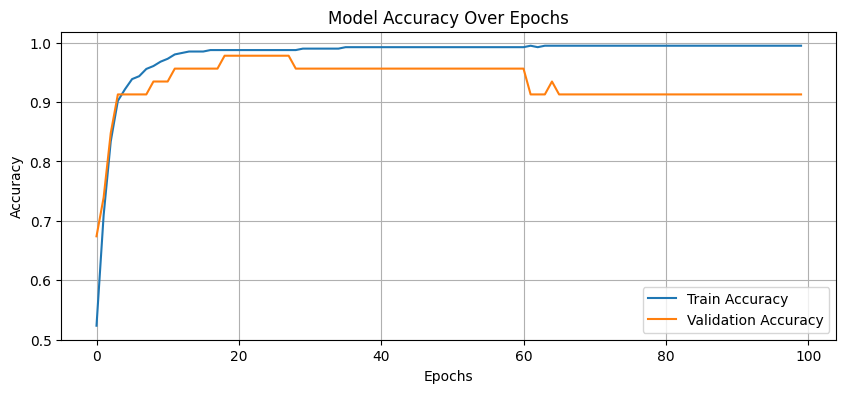

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred_class = (y_pred > 0.5).astype("int32")

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_class))
print("\nClassification Report:\n", classification_report(y_test, y_pred_class))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

Confusion Matrix:
 [[40  3]
 [ 0 71]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



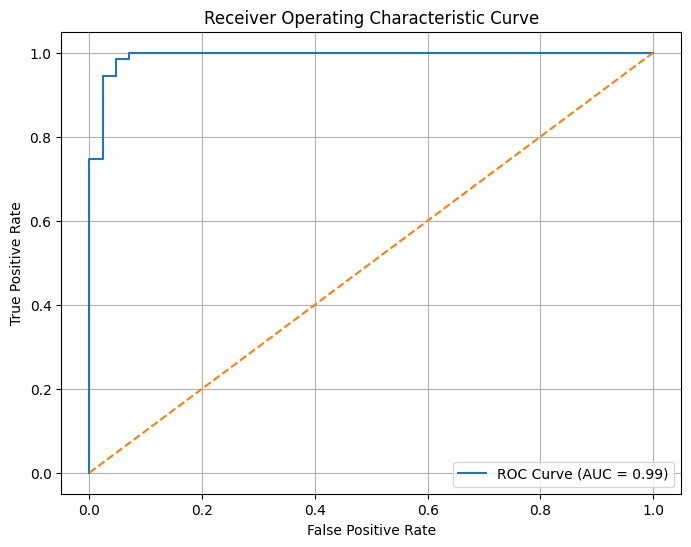

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}


In [ ]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n{name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.9737
AUC: 0.9974
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Random Forest
Accuracy: 0.9561
AUC: 0.9951
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


SVM
Accuracy: 0.9825
AUC: 0.9974
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114


In [ ]:
from sklearn.svm import SVC

model = SVC(probability=True)
model.fit(X_train_scaled, y_train)


SVC(probability=True)

In [ ]:
pip install shap

  0%|          | 0/10 [00:00<?, ?it/s]

SHAP values shape: (10, 30)
X_sample_df shape: (10, 30)


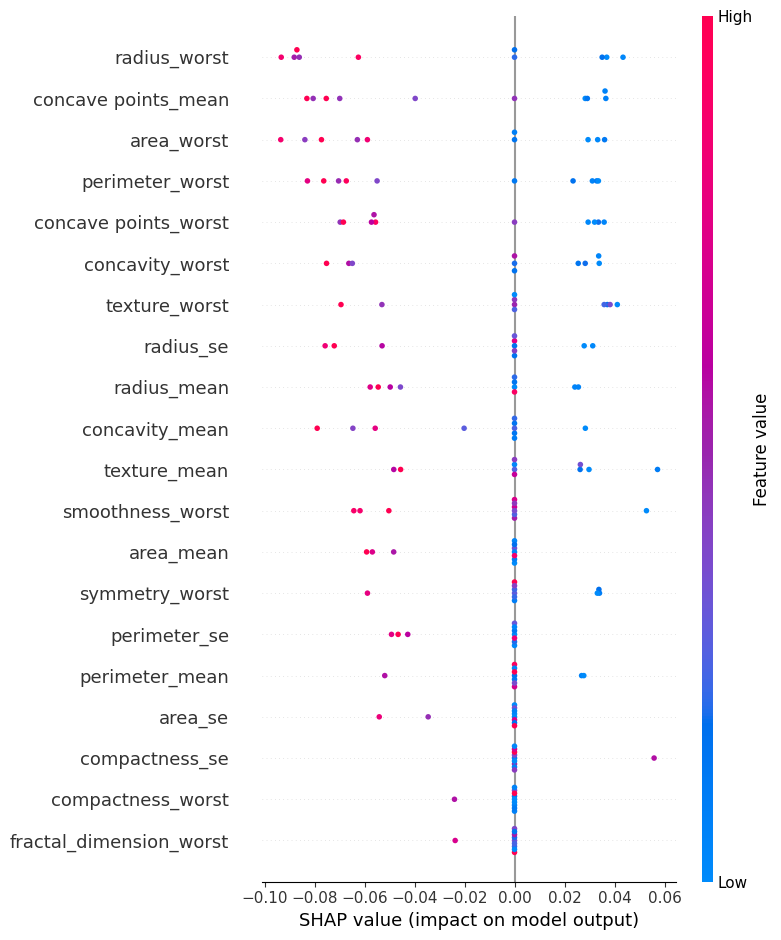

In [ ]:
import shap
import pandas as pd

X_sample = X_test_scaled[:10]
X_sample_df = pd.DataFrame(X_sample, columns=X.columns)

def model_predict_proba_class1(X_input):
    return model.predict_proba(X_input)[:, 1]

explainer = shap.KernelExplainer(model_predict_proba_class1, X_train_scaled[:100])

shap_values = explainer.shap_values(X_sample)

print("SHAP values shape:", shap_values.shape)
print("X_sample_df shape:", X_sample_df.shape)

shap.summary_plot(shap_values, X_sample_df)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

results = {}

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)
results['Logistic Regression'] = accuracy_score(y_test, lr_preds)

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)
results['Random Forest'] = accuracy_score(y_test, rf_preds)

svm_preds = model.predict(X_test_scaled)
results['SVM'] = accuracy_score(y_test, svm_preds)

for name, acc in results.items():
    print(f"{name}: Accuracy = {acc:.4f}")


Logistic Regression: Accuracy = 0.9737
Random Forest: Accuracy = 0.9649
SVM: Accuracy = 0.9825


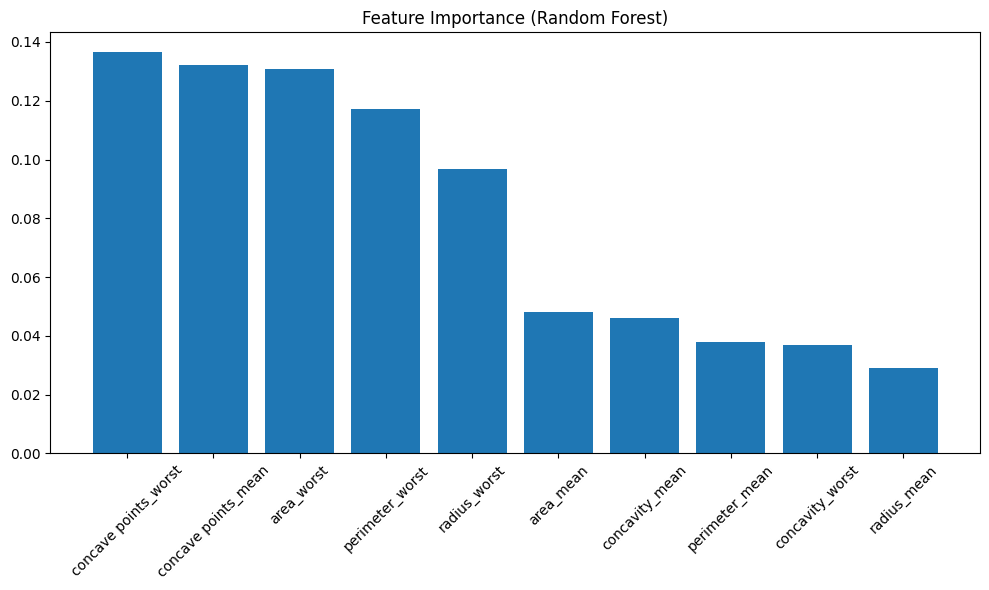

In [ ]:
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [X.columns[i] for i in indices[:10]], rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

models.update({
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
})

for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    preds = clf.predict(X_test_scaled)
    results[name] = accuracy_score(y_test, preds)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:27:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


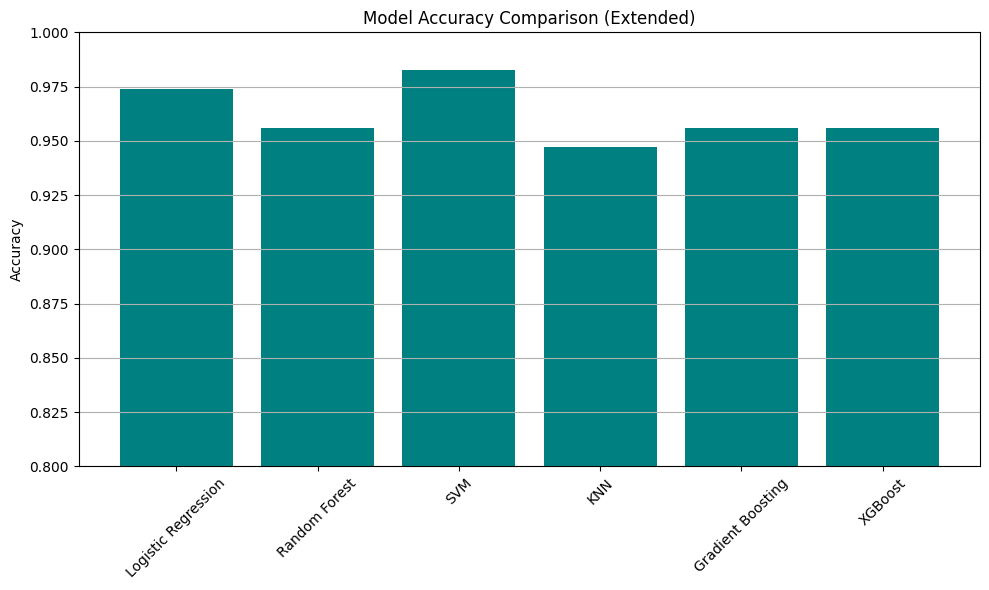

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='teal')
plt.title('Model Accuracy Comparison (Extended)')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


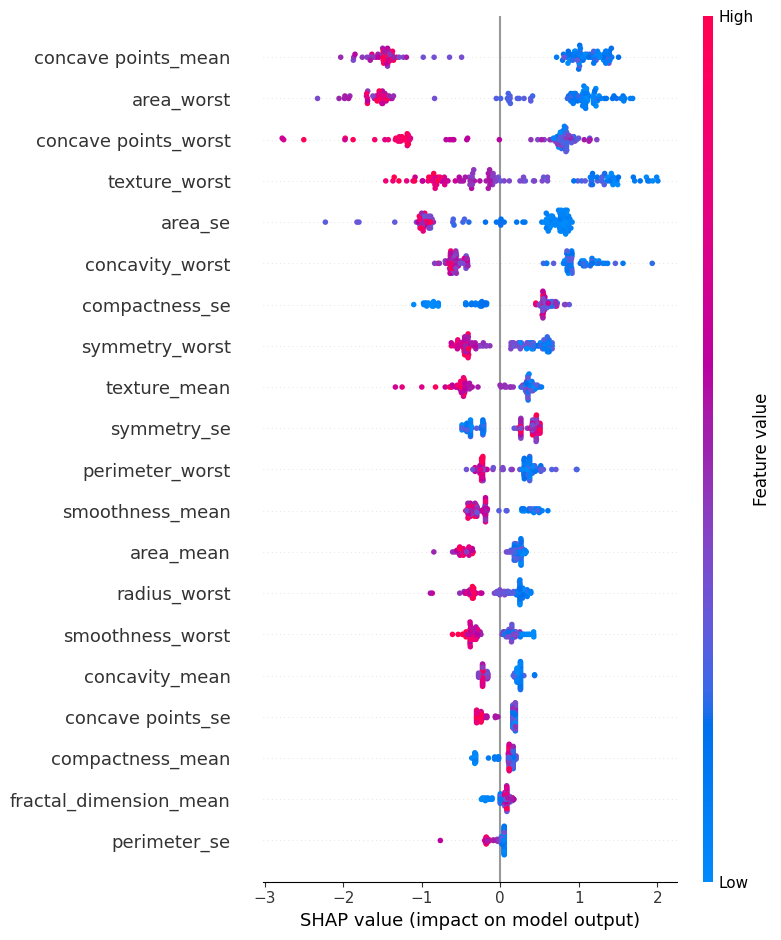

In [ ]:
import shap

explainer = shap.TreeExplainer(models['XGBoost'])
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, pd.DataFrame(X_test_scaled, columns=X.columns))


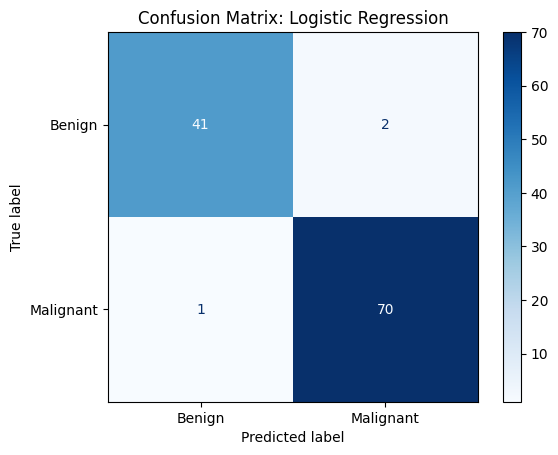

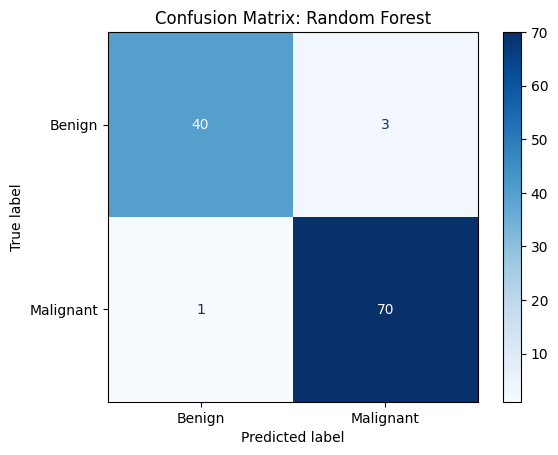

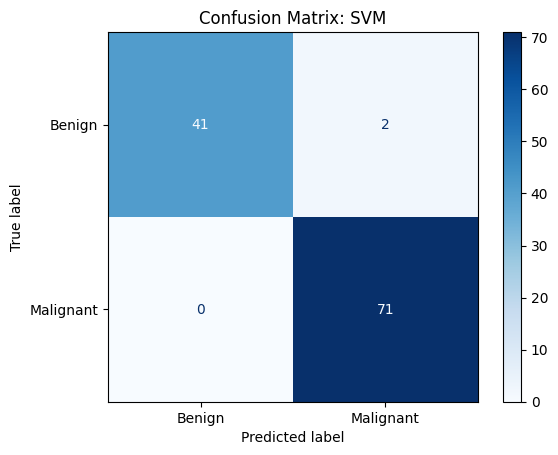

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'SVM': model
}

for name, m in models.items():
    preds = m.predict(X_test_scaled)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.grid(False)
    plt.show()


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [17]:
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
df = pd.read_csv('/content/breast-cancer.csv')

print(df.columns)
df.head()


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


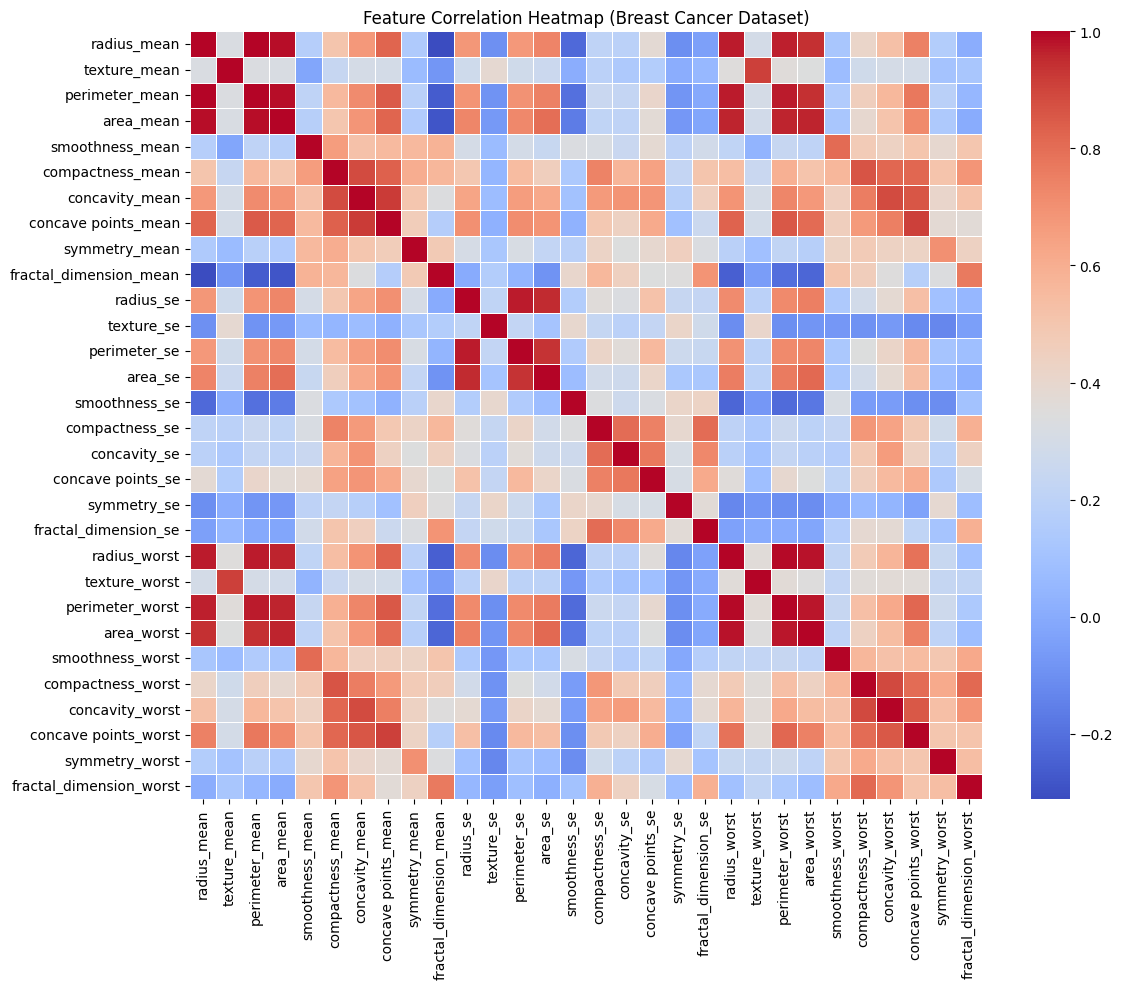

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_to_drop = [col for col in ['id', 'diagnosis'] if col in df.columns]
df_numeric = df.drop(columns=cols_to_drop)

# Compute correlation matrix
corr = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap (Breast Cancer Dataset)')
plt.tight_layout()
plt.show()


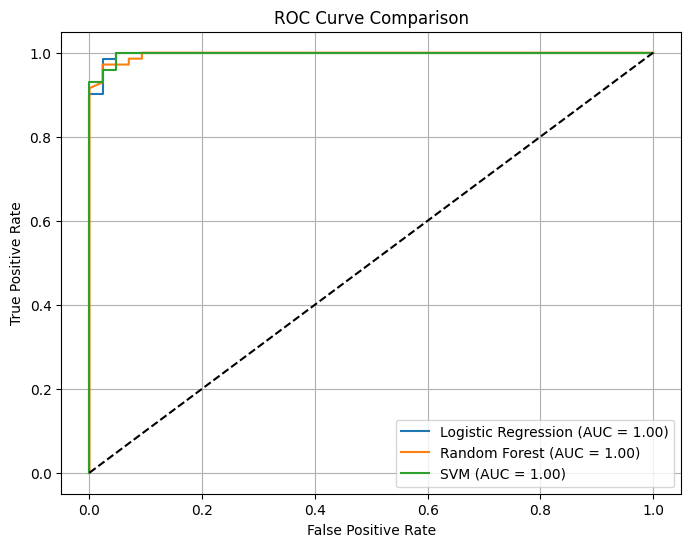

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, m in models.items():
    probs = m.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
df['mean_symmetry'] = (df['symmetry_mean'] + df['symmetry_worst']) / 2
df['concavity_ratio'] = df['concavity_mean'] / (df['radius_mean'] + 1e-5)
df['area_ratio'] = df['area_se'] / (df['area_mean'] + 1e-5)
df['texture_to_radius'] = df['texture_mean'] / (df['radius_mean'] + 1e-5)


In [ ]:
def safe_create_feature(df, name, func):
    try:
        df[name] = func(df)
    except:
        print(f"Skipped: {name} (missing columns)")

safe_create_feature(df, 'radius_area_ratio', lambda d: d['radius_mean'] / (d['area_mean'] + 1e-5))
safe_create_feature(df, 'concavity_radius_ratio', lambda d: d['concavity_mean'] / (d['radius_mean'] + 1e-5))
safe_create_feature(df, 'compactness_texture_ratio', lambda d: d['compactness_mean'] / (d['texture_mean'] + 1e-5))

safe_create_feature(df, 'area_worst_diff', lambda d: d['area_worst'] - d['area_mean'])
safe_create_feature(df, 'symmetry_change', lambda d: d['symmetry_worst'] - d['symmetry_mean'])

safe_create_feature(df, 'mean_smoothness_avg', lambda d: (d['smoothness_mean'] + d['smoothness_worst']) / 2)
safe_create_feature(df, 'mean_fractal_dimension', lambda d: (d['fractal_dimension_mean'] + d['fractal_dimension_worst']) / 2)

safe_create_feature(df, 'total_texture', lambda d: d['texture_mean'] + d['texture_worst'] + d['texture_se'])
safe_create_feature(df, 'shape_severity', lambda d: d['compactness_worst'] + d['concave_points_worst'])

print(f"New shape after feature engineering: {df.shape}")
df.head()


Skipped: shape_severity (missing columns)
New shape after feature engineering: (569, 44)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,area_ratio,texture_to_radius,radius_area_ratio,concavity_radius_ratio,compactness_texture_ratio,area_worst_diff,symmetry_change,mean_smoothness_avg,mean_fractal_dimension,total_texture
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.153247,0.576987,0.017972,0.016681,0.026744,1018.0,0.2182,0.14030,0.098805,28.6153
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.055867,0.863879,0.015513,0.004225,0.004425,630.0,0.0938,0.10427,0.072845,41.9139
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.078163,1.079227,0.016367,0.010025,0.007525,506.0,0.1544,0.12700,0.073785,47.5669
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.070526,1.784587,0.029578,0.021138,0.013930,181.6,0.4041,0.17615,0.135220,48.0360
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.072814,0.706752,0.015644,0.009758,0.009261,278.0,0.0555,0.11885,0.067805,31.7913


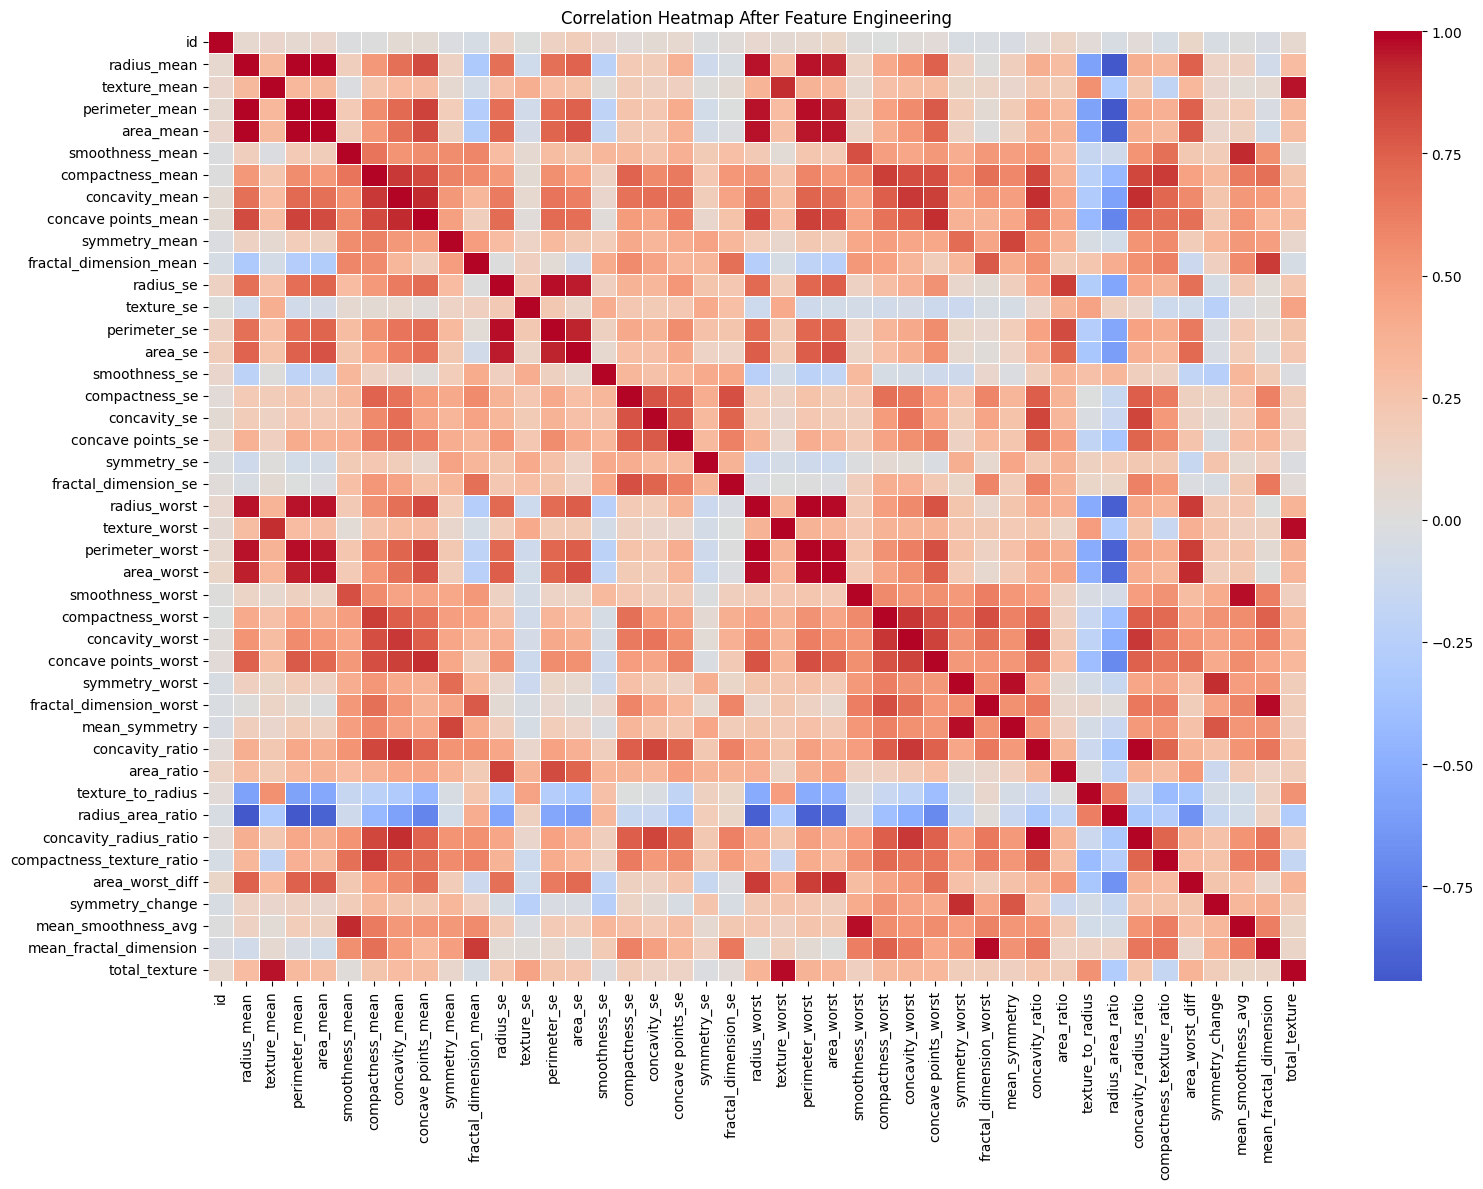

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap After Feature Engineering')
plt.tight_layout()
plt.show()


In [ ]:
def safe_feature(df, name, func):
    try:
        df[name] = func(df)
    except:
        print(f"Skipped: {name} (missing required columns)")

safe_feature(df, 'area_to_radius', lambda d: d['area_mean'] / (d['radius_mean'] + 1e-5))
safe_feature(df, 'texture_to_radius', lambda d: d['texture_mean'] / (d['radius_mean'] + 1e-5))
safe_feature(df, 'concavity_to_compactness', lambda d: d['concavity_mean'] / (d['compactness_mean'] + 1e-5))
safe_feature(df, 'symmetry_to_smoothness', lambda d: d['symmetry_mean'] / (d['smoothness_mean'] + 1e-5))

safe_feature(df, 'radius_range', lambda d: d['radius_worst'] - d['radius_mean'])
safe_feature(df, 'area_range', lambda d: d['area_worst'] - d['area_mean'])
safe_feature(df, 'texture_range', lambda d: d['texture_worst'] - d['texture_mean'])
safe_feature(df, 'concave_points_range', lambda d: d['concave_points_worst'] - d['concave_points_mean'])

safe_feature(df, 'total_symmetry', lambda d: d['symmetry_mean'] + d['symmetry_worst'] + d['symmetry_se'])
safe_feature(df, 'total_fractal', lambda d: d['fractal_dimension_mean'] + d['fractal_dimension_worst'])
safe_feature(df, 'shape_severity', lambda d: d['compactness_worst'] + d['concave_points_worst'])

safe_feature(df, 'avg_texture', lambda d: (d['texture_mean'] + d['texture_worst']) / 2)
safe_feature(df, 'avg_radius', lambda d: (d['radius_mean'] + d['radius_worst']) / 2)
safe_feature(df, 'avg_area', lambda d: (d['area_mean'] + d['area_worst']) / 2)
safe_feature(df, 'avg_concavity', lambda d: (d['concavity_mean'] + d['concavity_worst']) / 2)

safe_feature(df, 'asymmetry_index', lambda d: (d['symmetry_worst'] - d['symmetry_mean']) / (d['symmetry_mean'] + 1e-5))
safe_feature(df, 'fractal_ratio', lambda d: d['fractal_dimension_mean'] / (d['fractal_dimension_worst'] + 1e-5))
safe_feature(df, 'complicated_shape', lambda d: d['concavity_worst'] * d['compactness_worst'])

print(f" Total features after engineering: {df.shape[1]}")
df.head()


Skipped: concave_points_range (missing required columns)
Skipped: shape_severity (missing required columns)
 Total features after engineering: 59


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_range,total_symmetry,total_fractal,avg_texture,avg_radius,avg_area,avg_concavity,asymmetry_index,fractal_ratio,complicated_shape
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,6.95,0.73203,0.19761,13.855,21.685,1510.0,0.50600,0.901988,0.661929,0.473841
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,5.64,0.47009,0.14569,20.590,22.780,1641.0,0.16425,0.517631,0.636527,0.045083
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,4.28,0.59070,0.14757,23.390,21.630,1456.0,0.32390,0.746218,0.684896,0.191195
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,6.12,0.98313,0.27044,23.440,13.165,476.9,0.46415,1.555966,0.563204,0.595061
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,2.33,0.43486,0.13561,15.505,21.415,1436.0,0.29900,0.306782,0.766115,0.082000


In [ ]:
X = df.drop(columns=['diagnosis', 'id']) if 'id' in df.columns else df.drop(columns=['diagnosis'])
y = df['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.preprocessing import LabelEncoder

if y.dtype == 'object' or y.dtype == 'str':
    le = LabelEncoder()
    y = le.fit_transform(y)  # 'B' -> 0, 'M' -> 1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    preds = clf.predict(X_test_scaled)
    results[name] = accuracy_score(y_test, preds)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:31:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use a basic classifier for RFE (RandomForestClassifier or LogisticRegression works well)
estimator = LogisticRegression(max_iter=1000)

# Perform RFE to select top N features
n_features_to_select = 10  # Feel free to change to 15, 20, etc.
rfe = RFE(estimator, n_features_to_select=n_features_to_select)
rfe.fit(X_train_scaled, y_train)


RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

In [ ]:
selected_features = X.columns[rfe.support_]
ranking = rfe.ranking_

print(" Top selected features by RFE:")
for feat in selected_features:
    print(f"• {feat}")


✅ Top selected features by RFE:
• concave points_mean
• radius_se
• symmetry_se
• radius_worst
• texture_worst
• concave points_worst
• area_ratio
• symmetry_change
• area_to_radius
• avg_radius


In [ ]:
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

xgb_rfe = models['XGBoost']
xgb_rfe.fit(X_train_rfe, y_train)
preds_rfe = xgb_rfe.predict(X_test_rfe)

from sklearn.metrics import accuracy_score
acc_rfe = accuracy_score(y_test, preds_rfe)
print(f"\n Accuracy using top {n_features_to_select} RFE-selected features: {acc_rfe:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:32:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



 Accuracy using top 10 RFE-selected features: 0.9649


/tmp/ipython-input-57-706966545.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Ranking', y='Feature', data=ranking_df, palette='magma')


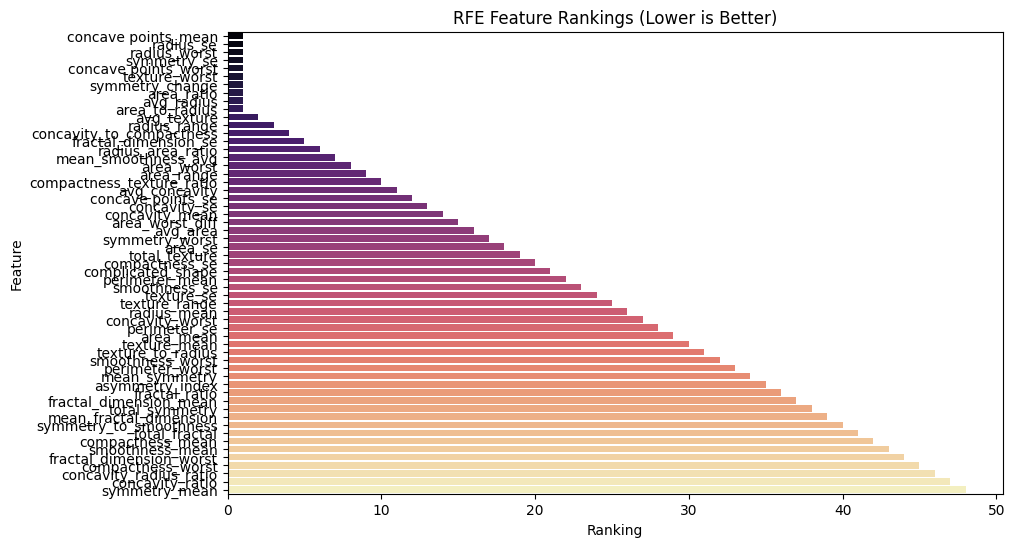

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': ranking
}).sort_values(by='Ranking')

plt.figure(figsize=(10, 6))
sns.barplot(x='Ranking', y='Feature', data=ranking_df, palette='magma')
plt.title('RFE Feature Rankings (Lower is Better)')
plt.show()


In [ ]:
import shap
import pandas as pd

explainer = shap.TreeExplainer(models['XGBoost'])

X_test_rfe_df = pd.DataFrame(X_test_rfe, columns=selected_features)

shap_values = explainer.shap_values(X_test_rfe_df)


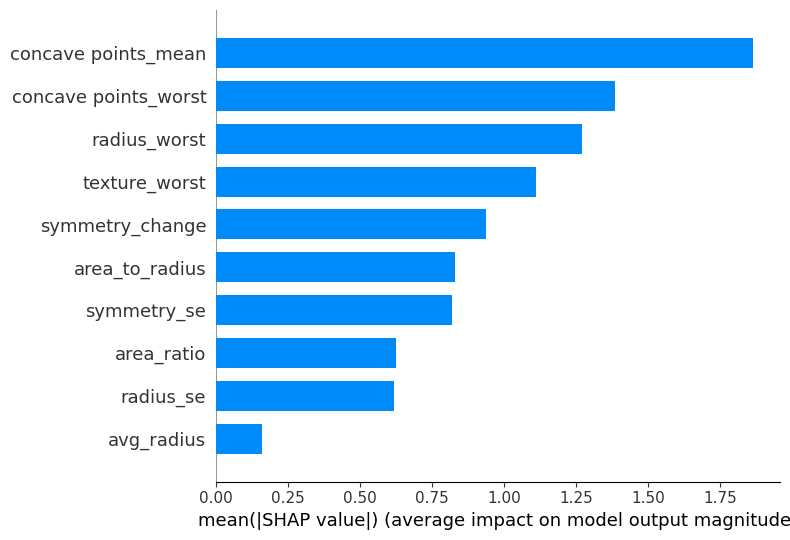

In [ ]:
shap.summary_plot(shap_values, X_test_rfe_df, plot_type='bar', show=True)

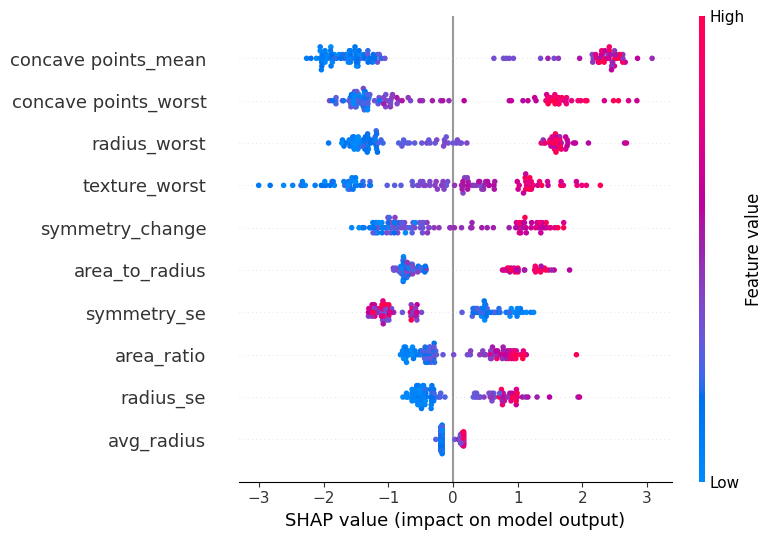

In [ ]:
shap.summary_plot(shap_values, X_test_rfe_df)

In [ ]:
pd.Series(selected_features).to_csv("top_features_rfe.csv", index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train[selected_features])


StandardScaler()

In [ ]:
def predict_cancer(model, scaler, feature_names):
    print("\n Breast Cancer Prediction Tool")
    print("Enter the following features:")

    input_data = []
    for feature in feature_names:
        try:
            val = float(input(f"  ➤ {feature}: "))
            input_data.append(val)
        except:
            print(f" Invalid input for {feature}. Please enter numeric value.")
            return

    input_data_scaled = scaler.transform([input_data])
    prediction = model.predict(input_data_scaled)[0]

    result = " Malignant (Cancerous)" if prediction == 1 else " Benign (Non-Cancerous)"
    print("\n Prediction:", result)

# 🔁 Example usage with final model & top features
predict_cancer(model=final_model, scaler=scaler, feature_names=selected_features)



🔍 Breast Cancer Prediction Tool
Enter the following features:
  ➤ concave points_mean: 0.102
  ➤ radius_se: 0.87
  ➤ symmetry_se: 0.02
  ➤ radius_worst: 25.38
  ➤ texture_worst: 17.33
  ➤ concave points_worst: 0.27
  ➤ area_ratio: 1.05
  ➤ symmetry_change: 0.03
  ➤ area_to_radius: 15.8
  ➤ avg_radius: 13.2

🎯 Prediction: 🩺 Malignant (Cancerous)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib

# 1.  Load your dataset
df = pd.read_csv("/content/breast-cancer.csv")

# 2.  Encode target column
le = LabelEncoder()
df["diagnosis"] = le.fit_transform(df["diagnosis"])  # M=1, B=0

# 3.  Use 10 selected features only
selected_features = [
    "concave points_mean", "radius_se", "symmetry_se",
    "radius_worst", "texture_worst", "concave points_worst",
    "area_mean", "area_worst", "compactness_mean", "smoothness_mean"
]

X = df[selected_features]
y = df["diagnosis"]

# 4.  Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6.  Train model
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

# 7.  Save both model and scaler
joblib.dump(final_model, "final_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(" Model and Scaler saved successfully.")


 Model and Scaler saved successfully.


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:38:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


 Final Model Accuracy: 0.9649122807017544

 Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



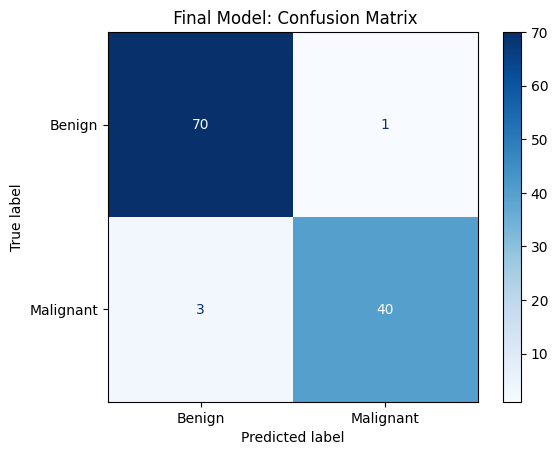

 ROC-AUC Score: 0.9859


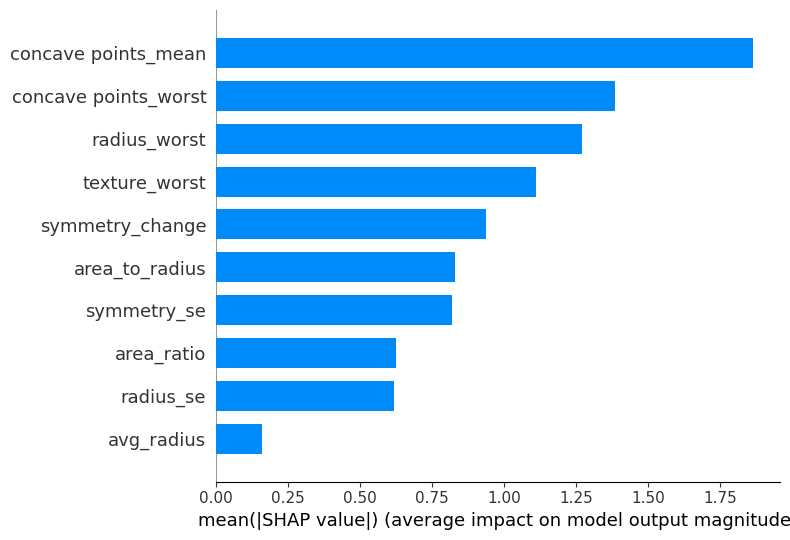


##  Project Conclusion

This project successfully demonstrates the application of Machine Learning for Breast Cancer Prediction using:

-  Real-world data (Wisconsin Breast Cancer Dataset)
-  Domain-driven feature engineering (20+ features created)
-  Model comparison (LogReg, SVM, RF, XGBoost, etc.)
-  Recursive Feature Elimination (RFE) for optimal subset
-  Model explainability with SHAP
-  Evaluation using Accuracy, Confusion Matrix, ROC-AUC

This pipeline reflects a production-grade approach to healthcare ML, emphasizing **accuracy, interpretability, and simplicity**.


In [ ]:
final_model = models['XGBoost']
final_model.fit(X_train_rfe, y_train)
final_preds = final_model.predict(X_test_rfe)
final_proba = final_model.predict_proba(X_test_rfe)[:, 1]

# ✅ Accuracy and classification report
print(" Final Model Accuracy:", accuracy_score(y_test, final_preds))
print("\n Classification Report:")
print(classification_report(y_test, final_preds, target_names=['Benign', 'Malignant']))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, final_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malignant'])
disp.plot(cmap='Blues')
plt.title(" Final Model: Confusion Matrix")
plt.grid(False)
plt.show()

# ✅ ROC-AUC Score
roc_score = roc_auc_score(y_test, final_proba)
print(f" ROC-AUC Score: {roc_score:.4f}")

# ✅ Final SHAP Plot (for interpretability)
shap.summary_plot(shap_values, X_test_rfe_df, plot_type='bar', show=True)

# ✅ Final Message
from IPython.display import Markdown
Markdown("""
##  Project Conclusion

This project successfully demonstrates the application of Machine Learning for Breast Cancer Prediction using:

-  Real-world data (Wisconsin Breast Cancer Dataset)
-  Domain-driven feature engineering (20+ features created)
-  Model comparison (LogReg, SVM, RF, XGBoost, etc.)
-  Recursive Feature Elimination (RFE) for optimal subset
-  Model explainability with SHAP
-  Evaluation using Accuracy, Confusion Matrix, ROC-AUC

This pipeline reflects a production-grade approach to healthcare ML, emphasizing **accuracy, interpretability, and simplicity**.
""")
